# Mushroom data set classification

## This data set is about classifie if a mushroom is edible or not.

### Importation of the librairies

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importation of the dataset

In [14]:
df = pd.read_csv("mushrooms.csv")

### Exploratory Data Analysis

In [15]:
df.dtypes
#All are object

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [16]:
df.isnull().sum() * 100 / len(df)
#0 missing data

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [17]:
#In the columns "stalk-shape" some value are missing and are marked as "?".
#I replace it with most frequent
df['stalk-root'].mode()
#b

0    b
dtype: object

In [18]:
df['stalk-root'].replace({"?": "b"}, inplace=True)

In [19]:
df.duplicated().sum()
#0 duplicated

0

In [20]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [21]:
df.nunique()
#veil-type --> 1
df.drop(["veil-type"], axis = 1, inplace = True)

In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=True)

In [ ]:
import dtale
dtale.show(df, open_browser=True)

### Feature Encoding

In [22]:
#All the features are categorical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in df:
    if df[i].dtypes == object:
        df[i] = le.fit_transform(df[i])

### Train / Test Split

In [24]:
x = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df[['class']]

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Feature Selection

Text(0.5, 1.0, 'pvalues with respect to features')

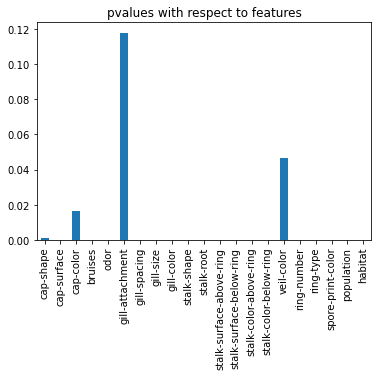

In [26]:
from sklearn.feature_selection import chi2
f_p_values = chi2(xtrain,ytrain)

p_values = pd.Series(f_p_values[1])
p_values.index=xtrain.columns
p_values
p_values.sort_index(ascending=True)

p_values > 0.05

p_values.plot.bar()
plt.title('pvalues with respect to features')

#gill-attachment is the only feature that is not relevante.

### Model Selection

In [ ]:
#Logistic Regression
#Decision Tree
#Random Forest
#Naive Bayes

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("NB", CategoricalNB()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, xtrain, ytrain.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.953044 (0.004836)
DTC: 1.000000 (0.000000)
RFC: 1.000000 (0.000000)
NB: 0.952338 (0.008087)


#### Decision Tree Validation Score

In [30]:
from sklearn.model_selection import validation_curve
n = np.arange(1, 20)
train_score, val_score = validation_curve(DecisionTreeClassifier(), xtrain, ytrain, "max_depth", n, cv = 5)
train_score.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9797679252575252

In [31]:
val_score.mean()

0.979385747292958

#### Decision Tree Validation Curve

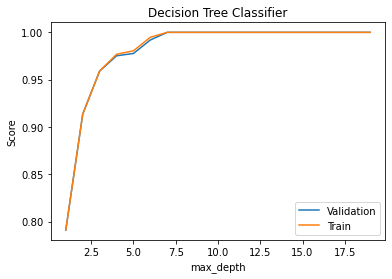

In [32]:
plt.plot(n, val_score.mean(axis = 1), label = "Validation")
plt.plot(n, train_score.mean(axis = 1), label = "Train")
plt.ylabel("Score")
plt.xlabel("max_depth")
plt.title("Decision Tree Classifier")
plt.legend()

#### Random Forest Validation Score

In [33]:
from sklearn.model_selection import validation_curve
n = np.arange(1, 20)
train_score, val_score = validation_curve(RandomForestClassifier(), xtrain, ytrain.values.ravel(), "max_depth", n, cv = 5)
train_score.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9874761533154999

In [34]:
val_score.mean()

0.9872814074918156

#### Random Forest Validation Curve

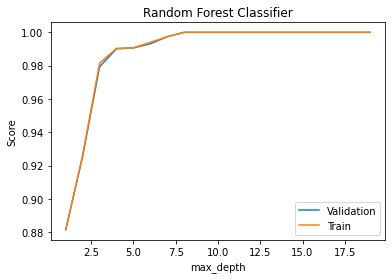

In [35]:
plt.plot(n, val_score.mean(axis = 1), label = "Validation")
plt.plot(n, train_score.mean(axis = 1), label = "Train")
plt.ylabel("Score")
plt.xlabel("max_depth")
plt.title("Random Forest Classifier")
plt.legend()

#### Logistic Regression Validation Score

In [37]:
from sklearn.model_selection import validation_curve
n = np.arange(1, 20)
train_score, val_score = validation_curve(LogisticRegression(), xtrain, ytrain.values.ravel(), "C", n, cv = 5)
train_score.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=C, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.96143601343727

In [38]:
val_score.mean()

0.9611680650030135

#### Logistic Regression Validation Curve

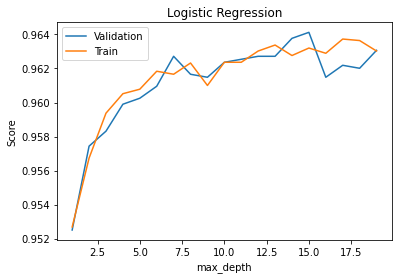

In [39]:
plt.plot(n, val_score.mean(axis = 1), label = "Validation")
plt.plot(n, train_score.mean(axis = 1), label = "Train")
plt.ylabel("Score")
plt.xlabel("max_depth")
plt.title("Logistic Regression")
plt.legend()

#### Naive Bayes Validation Score

In [40]:
from sklearn.model_selection import validation_curve
n = np.arange(1, 20)
train_score, val_score = validation_curve(CategoricalNB(), xtrain, ytrain.values.ravel(), "alpha", n, cv = 5)
train_score.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=alpha, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9365708297497862

In [41]:
val_score.mean()

0.9353610817087743

#### Naive Bayes Validation Curve

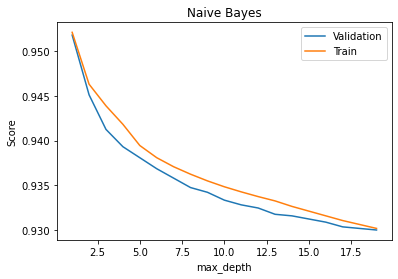

In [42]:
plt.plot(n, val_score.mean(axis = 1), label = "Validation")
plt.plot(n, train_score.mean(axis = 1), label = "Train")
plt.ylabel("Score")
plt.xlabel("max_depth")
plt.title("Naive Bayes")
plt.legend()

#### The selected model is Random Forest Classifier

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
predictions = rfc.predict(xtest)
print(accuracy_score(ytest, predictions))
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

<ipython-input-43-e7c62ede03cc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain, ytrain)


1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [44]:
from sklearn.metrics import accuracy_score
print(rfc.score(xtest, ytest))
ypred = rfc.predict(xtest)
print("Accuracy: ", accuracy_score(ytest, ypred))

1.0
Accuracy:  1.0


### Model Deployment (Web App) Preparation

In [45]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(rfc, file)
model = open('model.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(xtest)
accuracy_score(ytest, ypred)

1.0